In [2]:
import gym
from model import DeepQNetwork, Agent

import numpy as np
from gym import wrappers

import matplotlib.pyplot as plt 

def plotLearning(x, scores, epsilons, filename):   
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-5):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    #ax2.xaxis.tick_top()
    ax2.axes.get_xaxis().set_visible(False)    
    ax2.yaxis.tick_right()
    #ax2.set_xlabel('x label 2', color="C1") 
    ax2.set_ylabel('Score', color="C1")       
    #ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    #ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

    plt.savefig(filename)


if __name__ == '__main__':
    env = gym.make('SpaceInvaders-v0')
    brain = Agent(gamma=0.95, epsilon=1.0, 
                  alpha=0.003, maxMemorySize=5000,
                  replace=None)   
    while brain.memCntr < brain.memSize:
        observation = env.reset()
        done = False
        while not done:
            # 0 no action, 1 fire, 2 move right, 3 move left, 4 move right fire, 5 move left fire
            action = env.action_space.sample()
            observation_, reward, done, info = env.step(action)
            if done and info['ale.lives'] == 0:
                reward = -100                  
            brain.storeTransition(np.mean(observation[15:200,30:125], axis=2), action, reward, 
                                np.mean(observation_[15:200,30:125], axis=2))
            observation = observation_
    print('done initializing memory')

    scores = []
    epsHistory = []
    numGames = 50
    batch_size=32
    # uncomment the line below to record every episode. 
    #env = wrappers.Monitor(env, "tmp/space-invaders-1", video_callable=lambda episode_id: True, force=True)
    for i in range(numGames):
        print('starting game ', i+1, 'epsilon: %.4f' % brain.EPSILON)
        epsHistory.append(brain.EPSILON)        
        done = False
        observation = env.reset()
        frames = [np.sum(observation[15:200,30:125], axis=2)]
        score = 0
        lastAction = 0   
        while not done:
            if len(frames) == 3:
                action = brain.chooseAction(frames)
                frames = []
            else:
                action = lastAction
            observation_, reward, done, info = env.step(action)
            score += reward
            frames.append(np.sum(observation_[15:200,30:125], axis=2))
            if done and info['ale.lives'] == 0:
                reward = -100 
            brain.storeTransition(np.mean(observation[15:200,30:125], axis=2), action, reward, 
                                  np.mean(observation_[15:200,30:125], axis=2))
            observation = observation_            
            brain.learn(batch_size)
            lastAction = action
            env.render()
        scores.append(score)
        print('score:',score)


done initializing memory
starting game  1 epsilon: 1.0000
score: 330.0
starting game  2 epsilon: 1.0000
score: 185.0
starting game  3 epsilon: 0.9464
score: 140.0
starting game  4 epsilon: 0.8785
score: 30.0
starting game  5 epsilon: 0.8172
score: 45.0
starting game  6 epsilon: 0.7636
score: 80.0
starting game  7 epsilon: 0.6991
score: 90.0
starting game  8 epsilon: 0.6505
score: 65.0
starting game  9 epsilon: 0.5879
score: 45.0
starting game  10 epsilon: 0.5250
score: 35.0
starting game  11 epsilon: 0.4876
score: 355.0
starting game  12 epsilon: 0.4101
score: 480.0
starting game  13 epsilon: 0.3078
score: 210.0
starting game  14 epsilon: 0.2248
score: 225.0
starting game  15 epsilon: 0.1276
score: 260.0
starting game  16 epsilon: 0.0500
score: 260.0
starting game  17 epsilon: 0.0500
score: 545.0
starting game  18 epsilon: 0.0500
score: 80.0
starting game  19 epsilon: 0.0500
score: 155.0
starting game  20 epsilon: 0.0500
score: 180.0
starting game  21 epsilon: 0.0500
score: 410.0
start

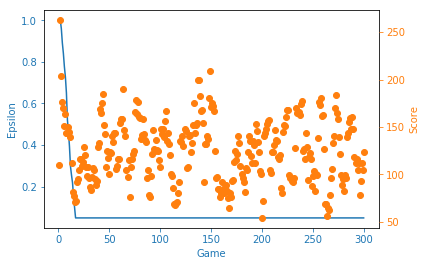

In [4]:
x = [i+1 for i in range(numGames)]
fileName = str(numGames) + 'Games' + 'Gamma' + str(brain.GAMMA) + \
               'Alpha' + str(brain.ALPHA) + 'Memory' + str(brain.memSize)+ '.png'    
plotLearning(x, scores, epsHistory, fileName)

In [5]:
env.render()

True